In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [10]:
df_europapark = pd.read_parquet("../data/processed/ep/merged_data.parquet")
df_rulantica = pd.read_parquet("../data/processed/rulantica/merged_data.parquet")
df_europapark

,ride_name,timestamp,wait_time,closed,temperature,rain,wind
0,alpine express enzian,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1
1,poppy towers,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1
2,silver star,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1
3,swiss bob run,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1
4,tirol log flume,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1
...,...,...,...,...,...,...,...
14196898,fjordrafting,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN
14196899,jim button journey through morrowland,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN
14196900,josefinas magical imperial journey,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN
14196901,madame freudenreich curiosits,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN


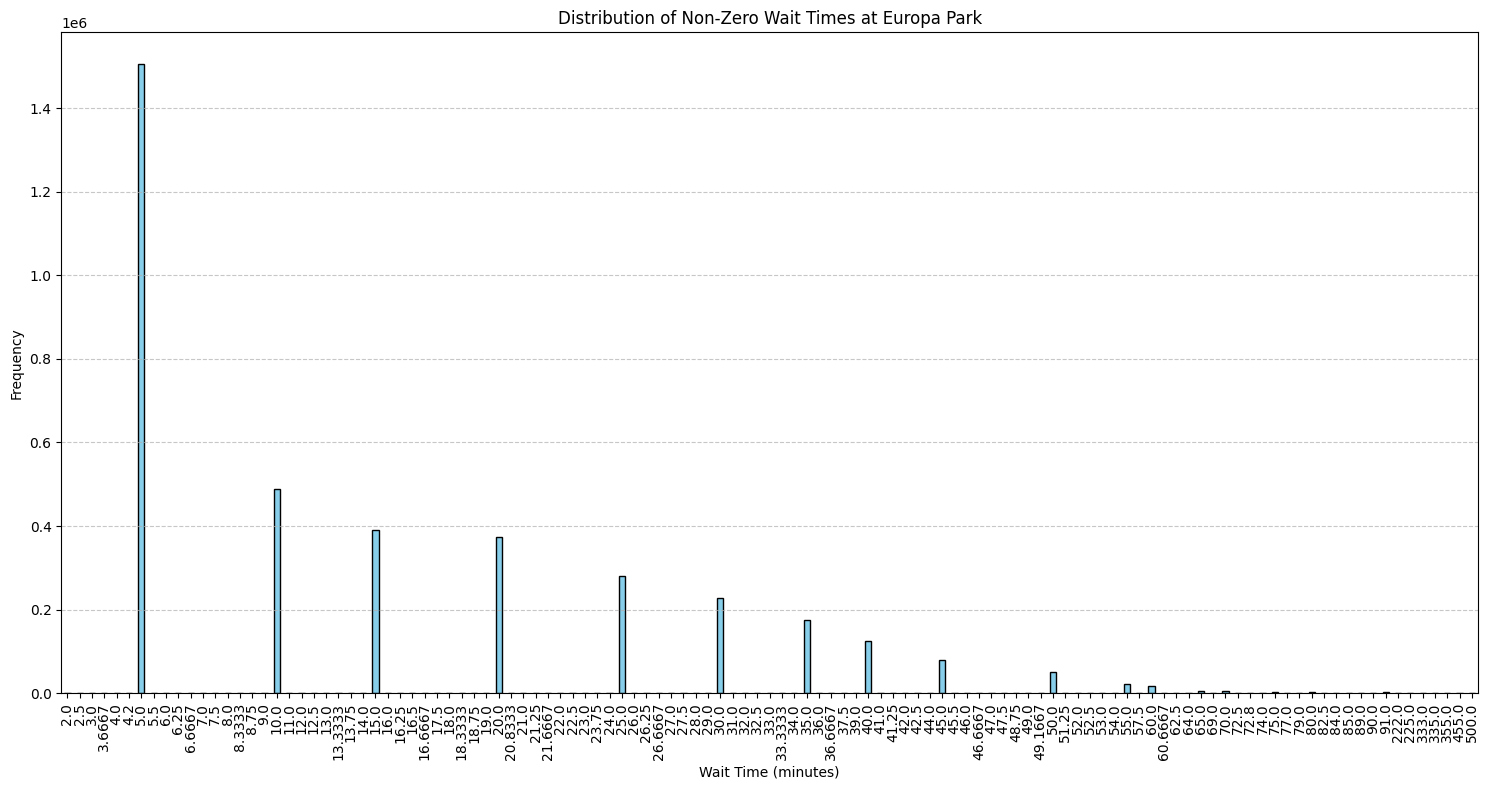

Total non-zero wait time entries: 3757491
Number of unique wait times: 115
Most common wait time: 5.0 minutes (frequency: 1505977)
Longest wait time: 500.0 minutes


In [3]:
#without 0 because there are too many
wait_time_counts = df_europapark[df_europapark["wait_time"] > 1]["wait_time"].value_counts().sort_index()

plt.figure(figsize=(15, 8))
wait_time_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Non-Zero Wait Times at Europa Park')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

print(f"Total non-zero wait time entries: {wait_time_counts.sum()}")
print(f"Number of unique wait times: {len(wait_time_counts)}")
print(f"Most common wait time: {wait_time_counts.idxmax()} minutes (frequency: {wait_time_counts.max()})")
print(f"Longest wait time: {wait_time_counts.index.max()} minutes")

In [4]:
wait_time_counts = df_europapark[df_europapark["wait_time"] > 1]["wait_time"].value_counts().sort_index()
non_divisible_by_5 = sum(count for wait_time, count in wait_time_counts.items() if wait_time % 5 != 0)

total = wait_time_counts.sum()
percentage = (non_divisible_by_5 / total) * 100

print(f"Entries not divisible by 5: {non_divisible_by_5}")
print(f"Percentage of total: {percentage:.2f}%")


Entries not divisible by 5: 3516
Percentage of total: 0.09%


Therefore we can probably clip those 0.09% to the next number which is dividable by 5

/tmp/ipykernel_150004/2045898530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europapark_filtered['hour'] = df_europapark_filtered['timestamp'].dt.hour


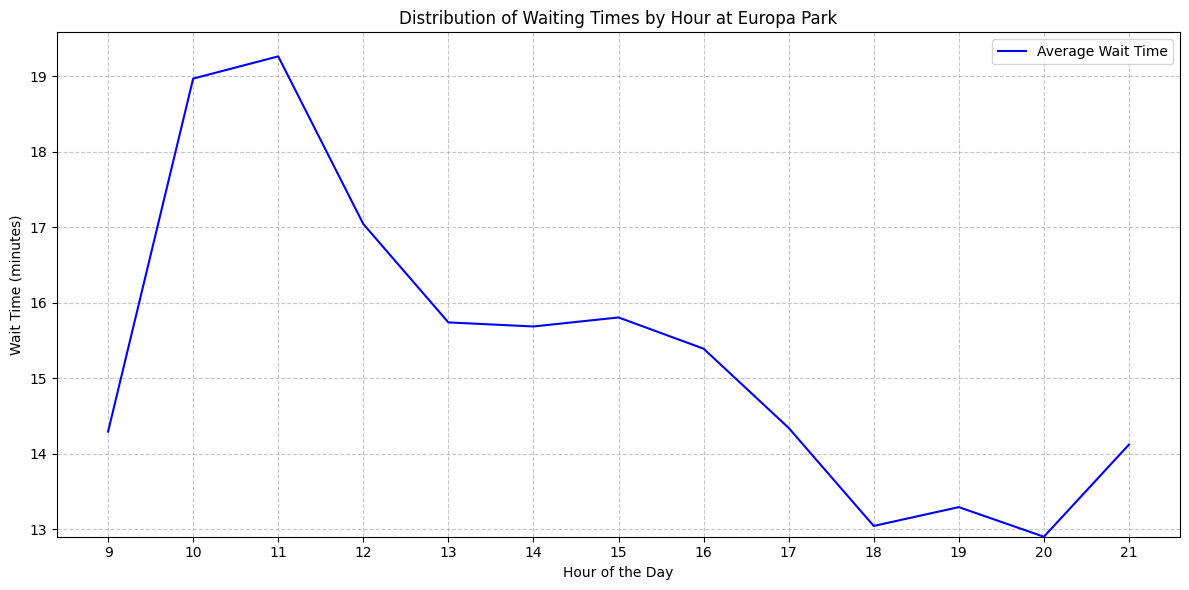

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_europapark_filtered = df_europapark[df_europapark["wait_time"] > 1]
df_europapark_filtered['hour'] = df_europapark_filtered['timestamp'].dt.hour
daily_wait_times = df_europapark_filtered.groupby('hour')['wait_time'].agg(['max', 'min', 'mean'])

first_hour = daily_wait_times.index.min()
last_hour = daily_wait_times.index.max()

min_wait_time = daily_wait_times['mean'].min()

plt.figure(figsize=(12, 6))
plt.plot(daily_wait_times.index, daily_wait_times['mean'], label='Average Wait Time', color='blue')

plt.title('Distribution of Waiting Times by Hour at Europa Park')
plt.xlabel('Hour of the Day')
plt.ylabel('Wait Time (minutes)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(first_hour, last_hour + 1))
plt.ylim(bottom=min_wait_time)
plt.tight_layout()
plt.show()



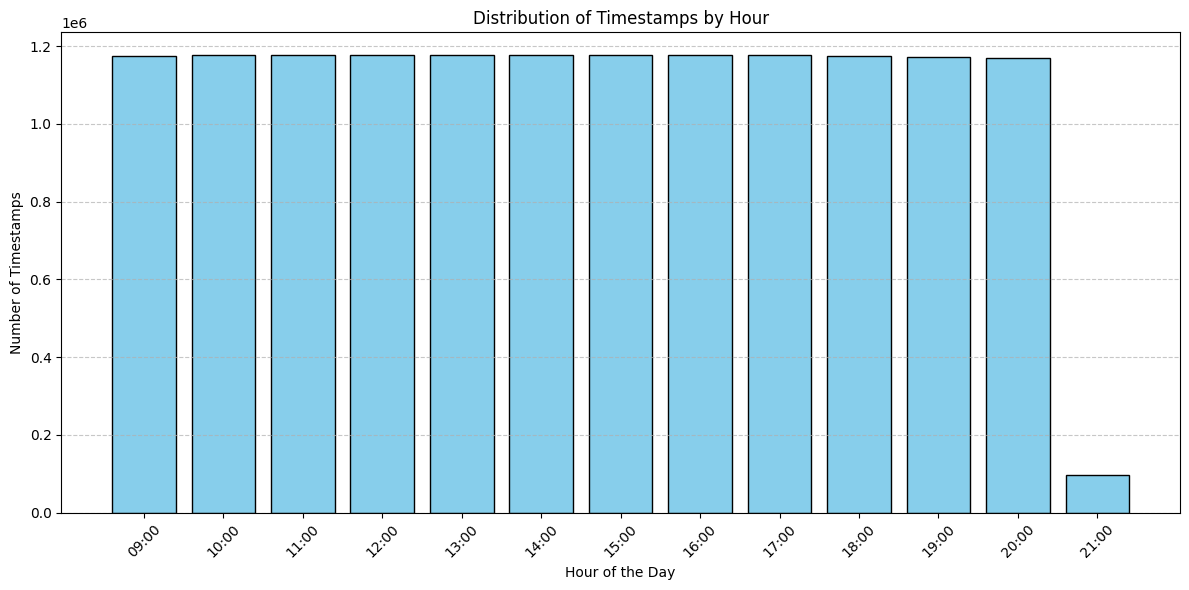

Hourly Distribution:
9     1175366
10    1175882
11    1175893
12    1176159
13    1176244
14    1176260
15    1176281
16    1176285
17    1176452
18    1174697
19    1171552
20    1168500
21      97332
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_europapark['hour'] = df_europapark['timestamp'].dt.hour

hourly_distribution = df_europapark['hour'].value_counts().sort_index()

full_hour_range = pd.Series(0, index=range(9, 22)) 
hourly_distribution = full_hour_range.add(hourly_distribution, fill_value=0).astype(int) 

hours_list = hourly_distribution.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(hours_list, hourly_distribution, color='skyblue', edgecolor='black')

plt.title('Distribution of Timestamps by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Timestamps')

plt.xticks(ticks=hours_list, labels=[f"{h:02d}:00" for h in hours_list], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Hourly Distribution:")
print(hourly_distribution)


<Figure size 1200x600 with 0 Axes>

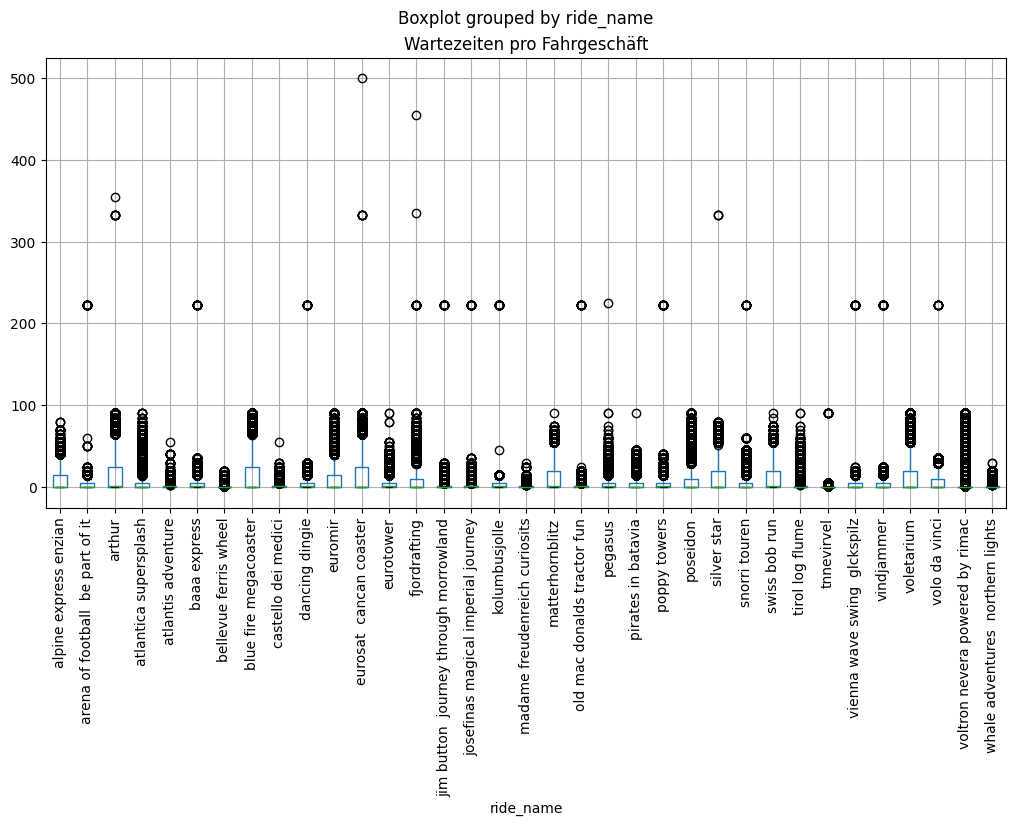

In [7]:
plt.figure(figsize=(12, 6))
df_europapark.boxplot(column='wait_time', by='ride_name', figsize=(12, 6))
plt.title('Wartezeiten pro Fahrgeschäft')
plt.xticks(rotation=90)
plt.show()


Total rows: 14196903
Rows after filtering: 12267578
Rows lost: 1929325
Percentage of data lost: 13.59%


<Figure size 1200x600 with 0 Axes>

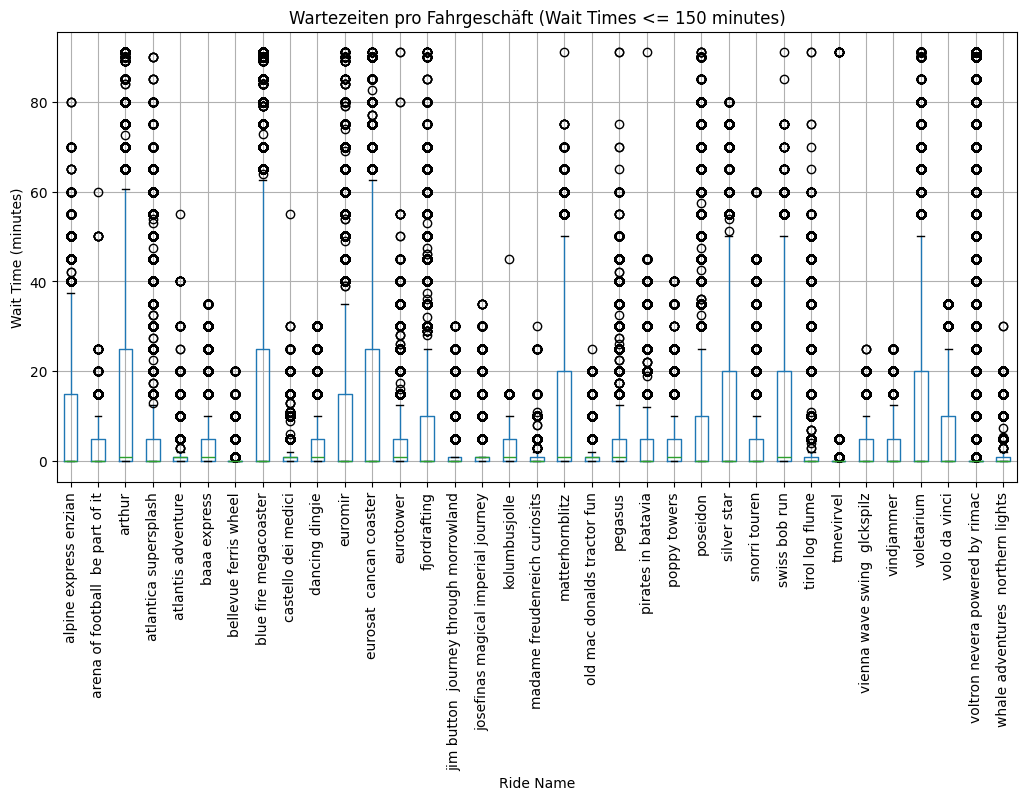

In [8]:

df_filtered = df_europapark[df_europapark['wait_time'] <= 150]

total_rows = len(df_europapark)
filtered_rows = len(df_filtered)
lost_rows = total_rows - filtered_rows
percentage_lost = (lost_rows / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows after filtering: {filtered_rows}")
print(f"Rows lost: {lost_rows}")
print(f"Percentage of data lost: {percentage_lost:.2f}%")

# Create the box plot
plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='wait_time', by='ride_name', figsize=(12, 6))
plt.title('Wartezeiten pro Fahrgeschäft (Wait Times <= 150 minutes)')
plt.suptitle('') 
plt.xticks(rotation=90)
plt.xlabel('Ride Name')
plt.ylabel('Wait Time (minutes)')
plt.show()


In [23]:

df_europapark['date'] = df_europapark['timestamp'].dt.date
opening_closing_times = df_europapark.groupby('date')['timestamp'].agg(['min', 'max'])
opening_closing_times

,min,max
date,,
2017-05-23,2017-05-23 09:00:00,2017-05-23 21:00:00
2017-05-24,2017-05-24 09:00:00,2017-05-24 21:00:00
2017-05-25,2017-05-25 09:00:00,2017-05-25 21:00:00
2017-05-26,2017-05-26 09:00:00,2017-05-26 21:00:00
2017-05-27,2017-05-27 09:00:00,2017-05-27 21:00:00
...,...,...
2024-12-27,2024-12-27 09:00:00,2024-12-27 21:00:00
2024-12-28,2024-12-28 09:00:00,2024-12-28 21:00:00
2024-12-29,2024-12-29 09:00:00,2024-12-29 21:00:00
